# Overview of Dataset

In [1]:
import pandas as pd

df = pd.read_csv('HOML.csv', sep=';')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data preprocessing

In [2]:
# customer_for is a new column representing the duration of each customer's relationship in the business. Specifically, it indicates how many days each customer has been in the business since their join date (date in the 'Dt_Customer' column).
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df["Dt_Customer"].agg(["min", "max"])
df["regist_month"] = df["Dt_Customer"].dt.month
df["regist_year"] = df["Dt_Customer"].dt.year

# Calculate the age of customers
df["age"] = 2014 - df["Year_Birth"]

# Determine if they are parents
df["is_parent"] = (df[["Kidhome", "Teenhome"]].sum(axis=1) > 0).astype(int)


In [3]:
def extract_day(date):
    day = str(date).split(" ", 1)[0]
    return pd.to_numeric(day, errors="coerce")


df["customer_for"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["customer_for"] = df["customer_for"].apply(extract_day)


df["amount_spent"] = df[
    "MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds".split()
].sum(axis=1)
df["life_time_value"] = df["amount_spent"] / ((df["customer_for"] + 1) / 365)

In [4]:
df["Living_With"] = df["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)
df["Children"] = df[["Kidhome", "Teenhome"]].sum(axis=1)

df["Family_Size"] = (
    df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]
)

# Segmenting education levels in three groups
df["Education"] = df["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

# For clarity
df = df.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
    }
)


# Dropping some of the redundant features
to_drop = [
    "Marital_Status",
    "Dt_Customer",
    "Year_Birth",
    "ID",
   "Registration_Year",
]

df = df.drop(to_drop, axis=1, errors="ignore")

In [5]:

# Create a column name mapping dictionary to map original column names to more understandable column names
column_mapping = {
    'ID': 'Customer_ID',
    'Year_Birth': 'Birth_Year',
    'Education': 'Education_Level',
    'Marital_Status': 'Marital_Status',
    'Income': 'Income',
    'Kidhome': 'Number_of_Kids_at_Home',
    'Teenhome': 'Number_of_Teenagers_at_Home',
    'Dt_Customer': 'Customer_Registration_Date',
    'Recency': 'Recency_Score',
    'Wines': 'Spending_on_Wines',
    'Fruits': 'Spending_on_Fruits',
    'Meat': 'Spending_on_Meat',
    'Fish': 'Spending_on_Fish',
    'Sweets': 'Spending_on_Sweets',
    'Gold': 'Spending_on_Gold',
    'NumDealsPurchases': 'Number_of_Deal_Purchases',
    'NumWebPurchases': 'Number_of_Web_Purchases',
    'NumCatalogPurchases': 'Number_of_Catalog_Purchases',
    'NumStorePurchases': 'Number_of_Store_Purchases',
    'NumWebVisitsMonth': 'Number_of_Web_Visits_Per_Month',
    'AcceptedCmp3': 'Accepted_Campaign_3',
    'AcceptedCmp4': 'Accepted_Campaign_4',
    'AcceptedCmp5': 'Accepted_Campaign_5',
    'AcceptedCmp1': 'Accepted_Campaign_1',
    'AcceptedCmp2': 'Accepted_Campaign_2',
    'Complain': 'Complaint_Flag',
    'Z_CostContact': 'Cost_of_Contact',
    'Z_Revenue': 'Revenue',
    'Response': 'Response_Flag',
    'regist_month': 'Registration_Month',
    'regist_year': 'Registration_Year',
    'age': 'Age',
    'is_parent': 'Is_Parent',
    'customer_for': 'Customer_Duration',
    'amount_spent': 'Total_Amount_Spent',
    'life_time_value': 'Customer_Lifetime_Value',
    'Living_With': 'Living_With',
    'Children': 'Number_of_Children',
    'Family_Size': 'Family_Size'
}

# Use the rename method to change column names to the new names
df.rename(columns=column_mapping, inplace=True)

# Print the DataFrame after the changes
df.head()


,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Registration_Month,Registration_Year,Age,Is_Parent,Customer_Duration,Total_Amount_Spent,Customer_Lifetime_Value,Living_With,Number_of_Children,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,9,2012,57,0,663,1617,888.862952,Alone,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,3,2014,60,1,113,27,86.447368,Alone,2,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,8,2013,49,0,312,776,904.920128,Partner,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,2,2014,30,1,139,53,138.178571,Partner,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,1,2014,33,1,161,422,950.802469,Partner,1,3


# Fill the missing values

In [6]:
# uses mode to fill the missing values
mode_values = df.mode().iloc[0]

df.fillna(mode_values, inplace=True)

In [7]:
#Separate X and y
X = df.drop(columns=['Customer_Lifetime_Value'])

y = df['Customer_Lifetime_Value']


X.head()

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Response_Flag,Registration_Month,Registration_Year,Age,Is_Parent,Customer_Duration,Total_Amount_Spent,Living_With,Number_of_Children,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,9,2012,57,0,663,1617,Alone,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,3,2014,60,1,113,27,Alone,2,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,8,2013,49,0,312,776,Partner,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,2,2014,30,1,139,53,Partner,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,1,2014,33,1,161,422,Partner,1,3


In [8]:
y.head()

0    888.862952
1     86.447368
2    904.920128
3    138.178571
4    950.802469
Name: Customer_Lifetime_Value, dtype: float64

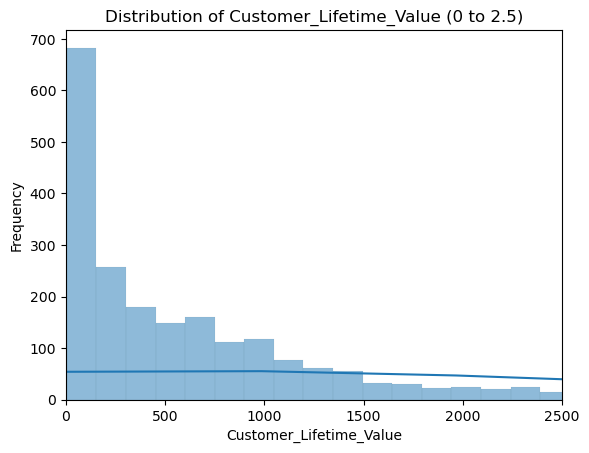

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(y, kde=True)
plt.xlabel('Customer_Lifetime_Value')
plt.ylabel('Frequency')
plt.title('Distribution of Customer_Lifetime_Value (0 to 2.5)')
plt.xlim(0, 2500)  # Set the X-axis range
plt.show()

In [10]:
#redefine the label class 
def classify_value(value):
    if value < 200:
        return 'Low'
    elif value > 800:
        return 'High'
    else:
        return 'Medium'

y= y.apply(classify_value)
y.head()

0    High
1     Low
2    High
3     Low
4    High
Name: Customer_Lifetime_Value, dtype: object

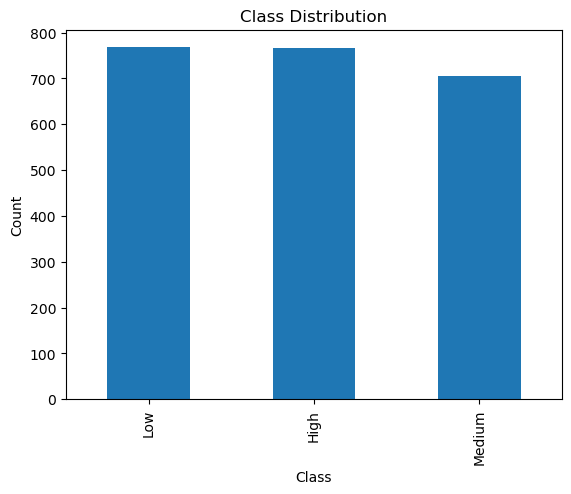

In [11]:
class_counts = y.value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Income', 'Recency_Score', 'Spending_on_Wines', 'Spending_on_Fruits', 'Spending_on_Meat', 'Spending_on_Fish', 'Spending_on_Sweets', 'Spending_on_Gold', 'Number_of_Deal_Purchases', 'Number_of_Web_Purchases', 'Number_of_Catalog_Purchases', 'Number_of_Store_Purchases', 'Number_of_Web_Visits_Per_Month', 'Age', 'Customer_Duration', 'Total_Amount_Spent']

X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [13]:
from sklearn.preprocessing import LabelEncoder

# encoder the non-number value ,we did not choose one hot 
label_encoder = LabelEncoder()

X['Living_With'] = label_encoder.fit_transform(X['Living_With'])
X['Education_Level'] = label_encoder.fit_transform(X['Education_Level'])

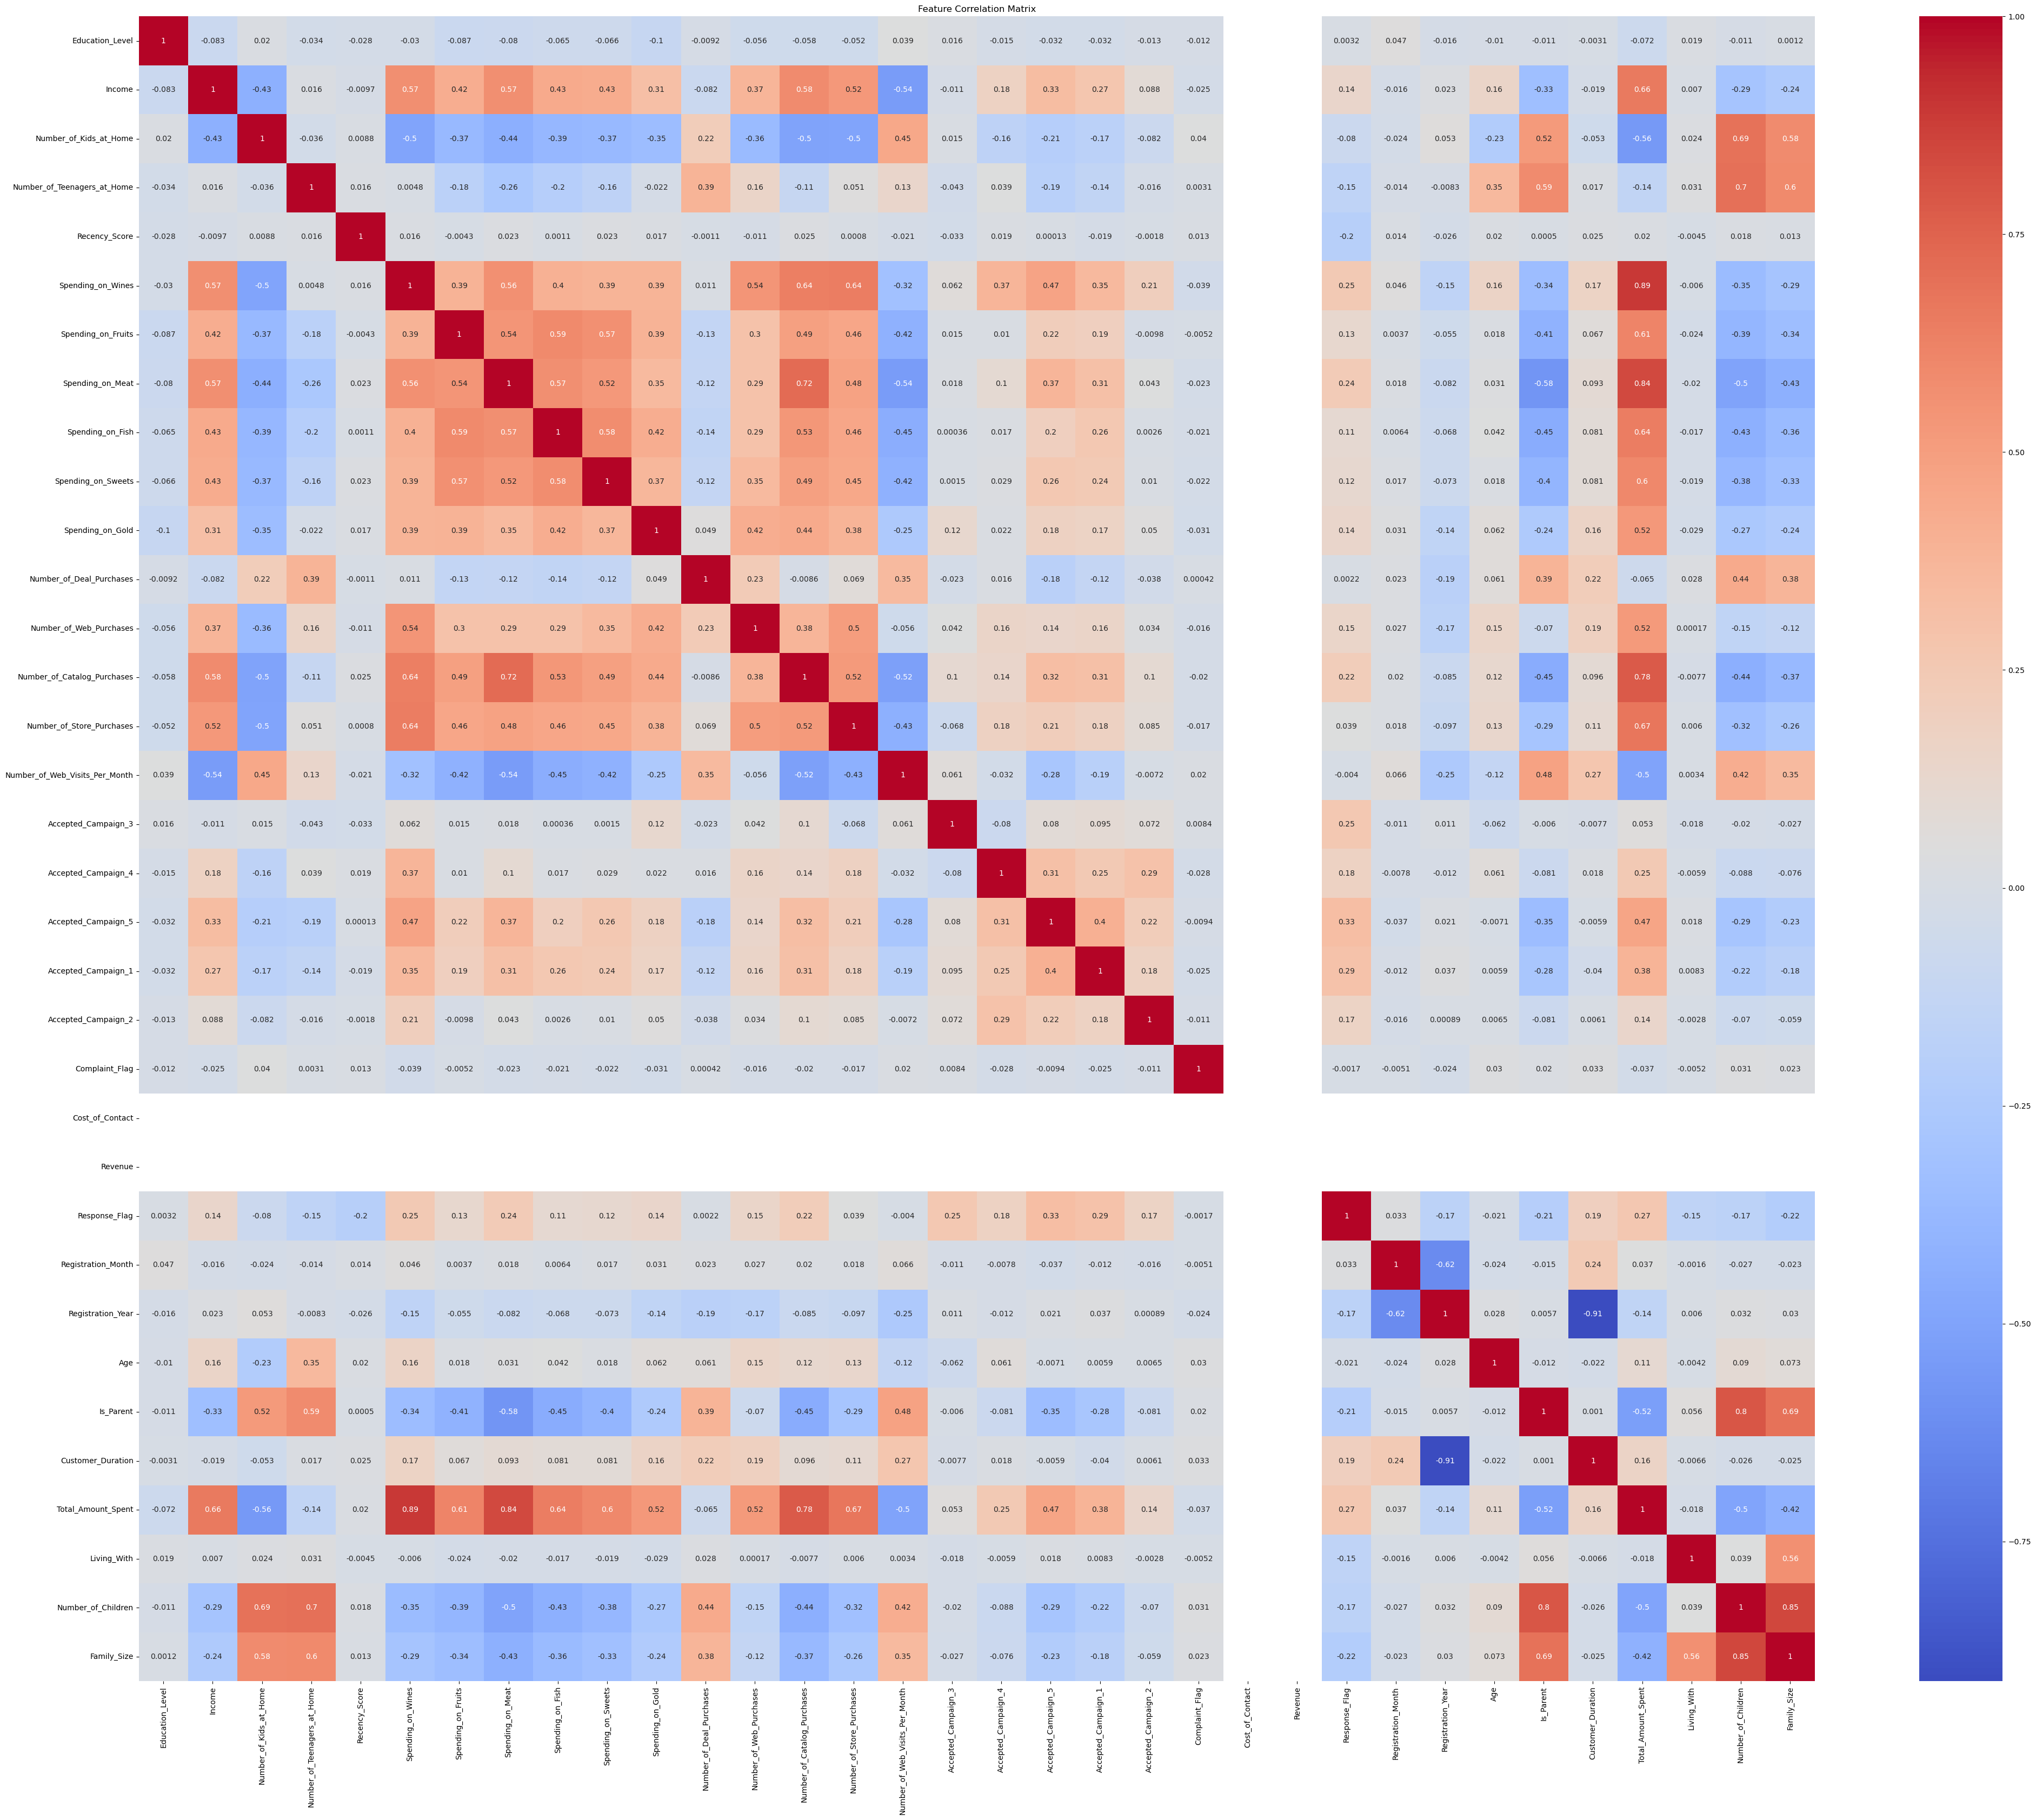

In [14]:
#Checking the Data's Correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr = X.corr()


plt.figure(figsize=(50, 40))


sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,   
            cmap='coolwarm')  


plt.title('Feature Correlation Matrix')

plt.show()


In [15]:
#Remove duplicate features with a correlation above 75% and visualize the correlation again
X= X.drop('Total_Amount_Spent', axis=1)
X= X.drop('Number_of_Children', axis=1)
X= X.drop('Is_Parent', axis=1)

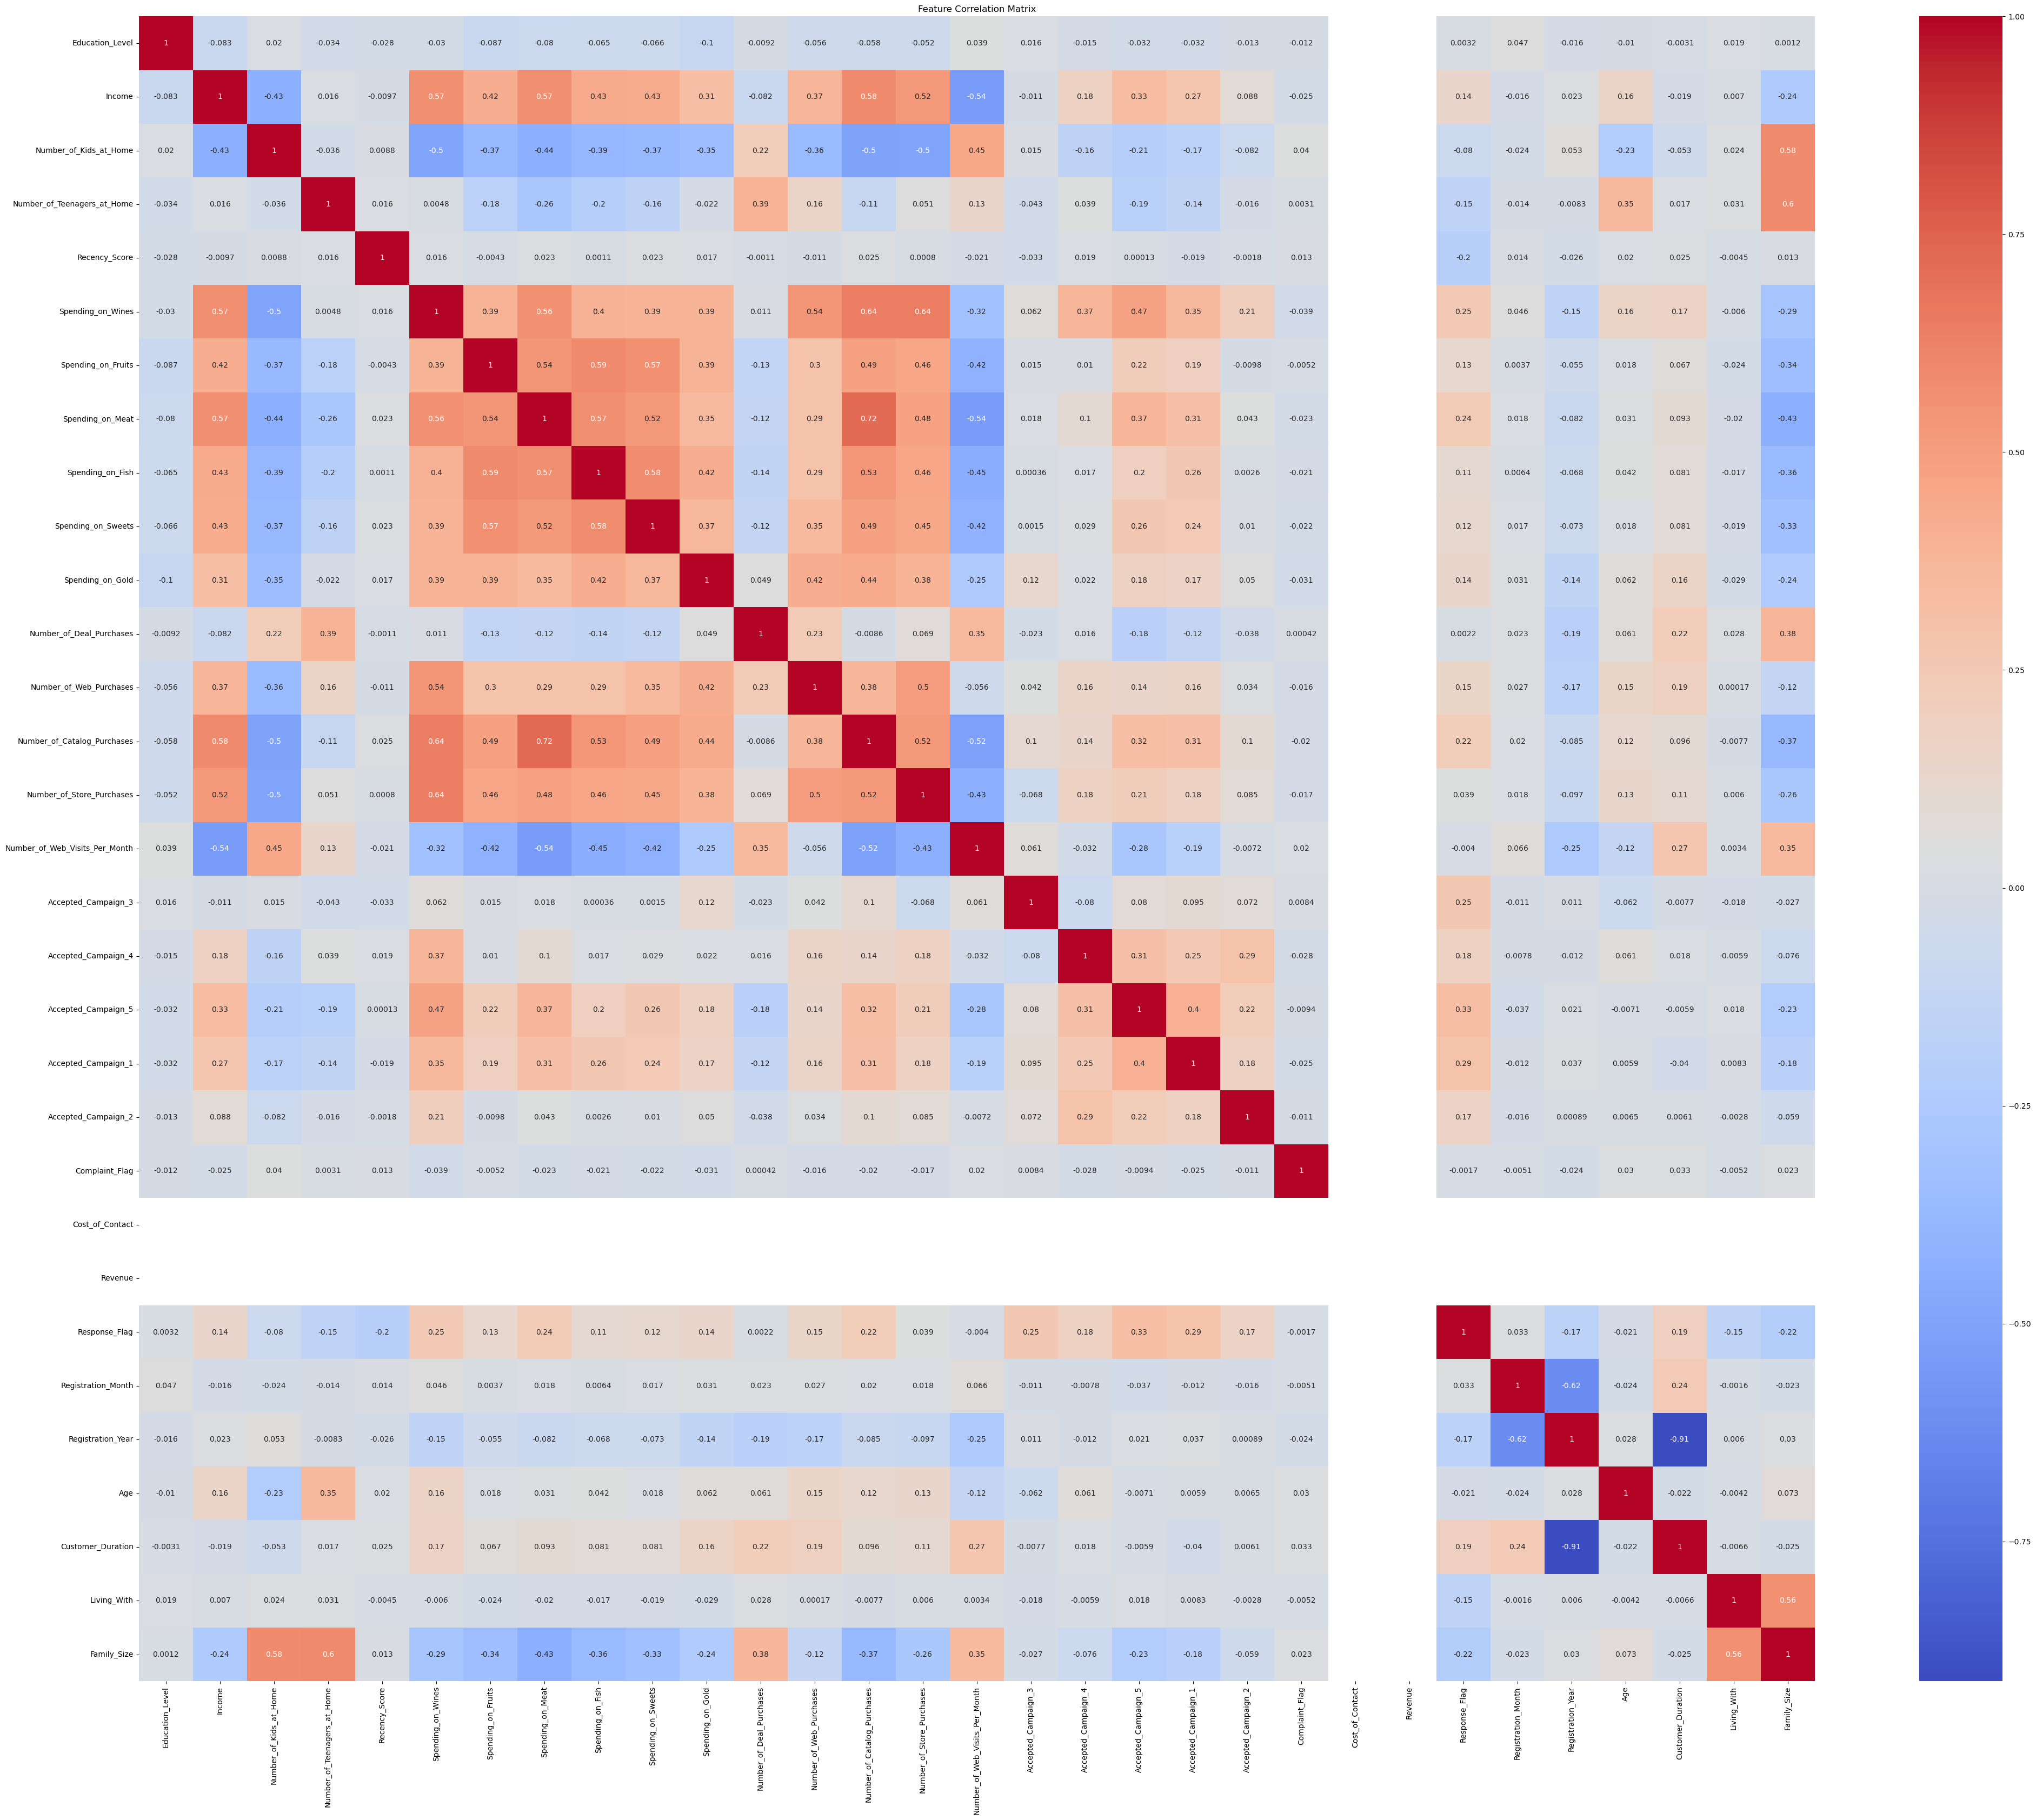

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr = X.corr()


plt.figure(figsize=(50, 40))


sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,   
            cmap='coolwarm')  


plt.title('Feature Correlation Matrix')


plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

(1568, 31)
(1568,)
(672, 31)
(672,)


In [19]:
X_train.head()

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Complaint_Flag,Cost_of_Contact,Revenue,Response_Flag,Registration_Month,Registration_Year,Age,Customer_Duration,Living_With,Family_Size
994,0,0.503649,1,1,-0.003777,-0.707043,-0.661449,-0.668912,-0.687068,-0.510354,...,0,3,11,0,6,2014,1.235733,-1.715096,0,3
2162,0,-0.174749,0,1,-1.350649,-0.308852,-0.183637,-0.247934,0.228401,-0.292284,...,0,3,11,0,8,2013,0.985345,-0.106801,1,3
906,0,1.361793,0,0,-1.350649,0.475643,0.042696,3.128753,-0.156096,-0.219594,...,0,3,11,1,11,2013,0.651494,-0.661044,0,1
572,2,-0.517622,1,0,-0.245523,-0.751617,-0.359673,-0.522677,-0.375808,-0.074215,...,0,3,11,0,9,2013,-0.767373,-0.319591,0,2
1877,0,0.830453,0,0,0.099828,0.306263,2.205426,1.232136,2.626932,3.342204,...,0,3,11,0,1,2014,0.901882,-0.962909,1,2


In [20]:
X_test.head()

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Complaint_Flag,Cost_of_Contact,Revenue,Response_Flag,Registration_Month,Registration_Year,Age,Customer_Duration,Living_With,Family_Size
324,0,-0.444112,0,1,0.997743,0.356780,-0.233933,-0.216914,-0.558902,-0.098445,...,0,3,11,0,1,2013,1.319196,0.892816,0,2
96,0,-0.151333,0,1,0.790532,0.597477,-0.661449,-0.624598,-0.687068,-0.655733,...,0,3,11,0,11,2012,0.734957,1.140246,0,2
2104,2,-1.476463,0,0,-0.314594,-0.897224,-0.485413,-0.691069,-0.394118,-0.364974,...,0,3,11,0,2,2013,-0.266596,0.655283,1,2
1259,0,0.977707,0,0,1.446700,1.283910,0.922876,3.452241,3.322688,3.923722,...,0,3,11,0,8,2013,-0.016208,-0.181030,1,2
1061,0,0.527576,0,2,-0.521805,1.304711,-0.183637,0.062260,-0.467355,-0.655733,...,0,3,11,0,7,2013,0.901882,-0.072161,1,4


# Training THE MODEL 

## SVM WITHOUT PCA

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
classifier = SVC(kernel='linear', random_state=42)

# Train the model using the training dataset
classifier.fit(X_train, y_train)

# use the trained model for predictions
y_pred = classifier.predict(X_test)

# Assess the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Output a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

        High       0.98      0.98      0.98       238
         Low       0.97      0.94      0.96       215
      Medium       0.93      0.95      0.94       219

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672



## Visualizing Model Evaluation, Generate Confusion Matrix

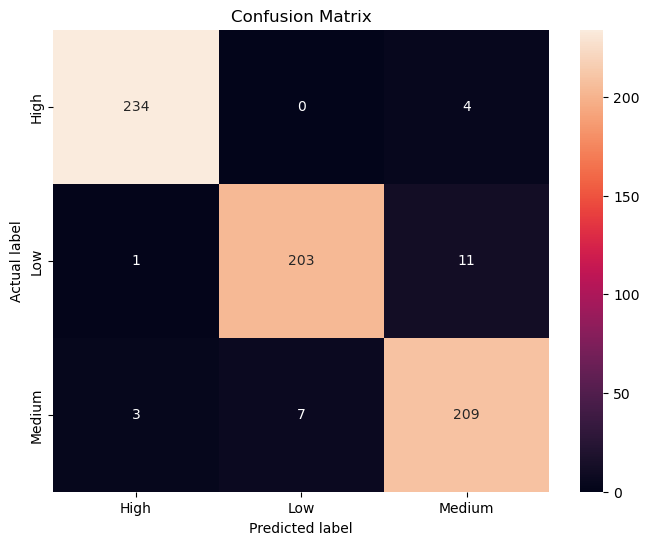

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)  


class_labels = sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Conclusion: The true positive and false negative rates are relatively high, indicating a good model fit.

## PCA with SVM 

In [23]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create a PCA object and specify the variance percentage to retain
variance_percentage = 0.90  # Retain 90% of variance
pca = PCA(n_components=variance_percentage)

# Fit the PCA model and reduce dimensionality using the training dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an SVM classifier
classifier_SVC = SVC(kernel='linear', random_state=42)

# Train the model using the reduced dimensionality training dataset
classifier_SVC.fit(X_train_pca, y_train)

# Make predictions using the trained model (remember to PCA-transform the test dataset as well)
y_pred = classifier_SVC.predict(X_test_pca)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Output a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.88
              precision    recall  f1-score   support

        High       0.90      0.87      0.89       238
         Low       0.95      0.93      0.94       215
      Medium       0.80      0.84      0.82       219

    accuracy                           0.88       672
   macro avg       0.88      0.88      0.88       672
weighted avg       0.88      0.88      0.88       672



# Analyze the learning curve of SVM with PCA to check for overfitting
Using the learning_curve function to calculate the training and cross-validation scores as the size of the training set increases.
Calculating the mean and standard deviation of the training and cross-validation scores.
Plotting a learning curve graph that includes training scores, cross-validation scores, and the range of their variances.


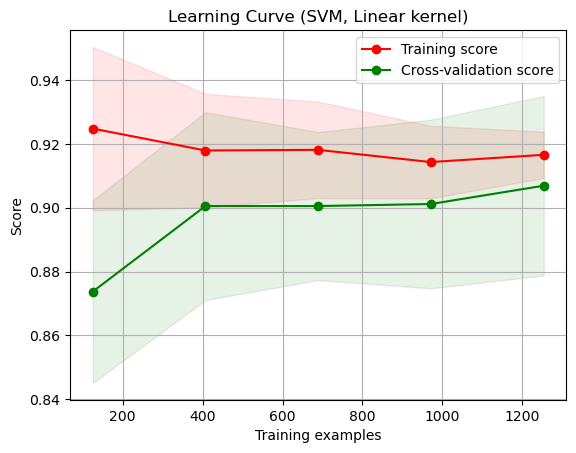

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

classifier_Svc = SVC(kernel='linear', random_state=42)

plot_learning_curve(classifier_Svc, "Learning Curve (SVM, Linear kernel)", 
                    X_train_pca, y_train, cv=5, n_jobs=4)

plt.show()


Red Curve (Training Score): Represents the model's performance on the training set. It shows how the training score changes as the number of training samples increases. In this example, as the sample size increases, the training score slightly decreases, which is normal because it's easier to overfit on smaller datasets, resulting in high training scores.

Green Curve (Cross-Validation Score): Represents the model's performance in cross-validation, which can be seen as the model's performance on new data. In this example, as the sample size increases, the cross-validation score gradually improves, indicating that the model's ability to generalize to unseen data is increasing.

Shaded Regions: Represent the standard deviation of the scores, showing the range of score variations and uncertainty. The red shade corresponds to the variability of the training score, while the green shade corresponds to the variability of the cross-validation score.

This graph indicates that the model may not have encountered severe overfitting or underfitting issues because both curves eventually stabilize, and the gap between them is relatively small. If the training score is significantly higher than the cross-validation score, it may indicate overfitting; if both are low, it may suggest underfitting. In this graph, the training score is slightly higher than the cross-validation score, but as the number of training samples increases, the cross-validation score gradually approaches the training score, indicating that the model has good generalization capabilities.

## Cross-Validation

In [25]:
import numpy as np
from sklearn import model_selection

SCORINGS = "f1_weighted"

xps = np.vstack([X_train, X_test])
yps = np.hstack([y_train, y_test])

scores = model_selection.cross_val_score(
    classifier_Svc, xps, yps, cv=10, scoring=SCORINGS
)
with np.printoptions(precision=2):
    print(scores)

print(f"\n{SCORINGS}: {scores.mean():.3f}, with std dev: {scores.std():.3f}\n")

[0.94 0.96 0.96 0.97 0.96 0.97 0.93 0.96 0.97 0.96]

f1_weighted: 0.959, with std dev: 0.014



In [26]:
# check dimentions of X 
num_rows, num_columns = X.shape
print(num_columns)

31


In [27]:
#Grid Search for Hyperparameters ---> Finding the Optimal PCA Principal Component Dimension
import sklearn
# Import necessary modules
import sklearn  # Import the sklearn module


fparam_grid = {"pca__n_components": [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28]}

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create PCA object
pca = PCA()

# Create SVM classifier
svm_classifier = SVC()

# Create PCA-SVM pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm_classifier)
])

# Define the hyperparameter grid to search over
param_grid = {
    'pca__n_components': [0.7, 0.8, 0.9],  # Different variance percentages for PCA
    'svm__C': [0.1, 1, 10],  # SVM's regularization parameter
    'svm__kernel': ['linear', 'rbf']  # SVM's kernel function
}

# Create a GridSearchCV object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=10)

# Perform grid search on the standardized feature data (X_standardized) and labels (y)
grid_search.fit(X_standardized, y)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best Score (f1_weighted):", grid_search.best_score_)

NameError: name 'X_standardized' is not defined

# More tries

## RandonForest MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


In [ ]:
importances = rf_classifier.feature_importances_
feature_names = X_train.columns  

# Plotting a Bar Chart of Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Reverse the y-axis to place high-importance features at the top
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Make predictions using the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))

# Plotting the Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


**The accuracy is quite decent.**

## check the learning curve

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define a function to obtain the learning curve.
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Draw the learning curve of the random forest
plot_learning_curve(rf_classifier, "Random Forest Learning Curve",  X_train_pca, y_train, cv=5, n_jobs=-1)
plt.show()


**overfitting？**

The training score (the red curve) is very high, close to 1.0, and it remains stable as the number of training samples increases. This usually indicates that the model performs very well on the training dataset.

The cross-validation score (the green curve) improves as the number of training samples increases, suggesting that the model's ability to generalize to new data strengthens with more training. However, the cross-validation score is consistently lower than the training score, and there is a noticeable gap between them.

When the training score is significantly higher than the cross-validation score, it's typically a sign of overfitting. However, if the cross-validation score continues to improve with more training data, it may mean that the model is still learning and could potentially enhance its generalization by adding more data.

In this graph, although there's a gap between the training and cross-validation scores, the fact that the cross-validation score is still increasing suggests that the model may not have reached its limit in terms of generalization. If the cross-validation score becomes stable or starts to decline, it would be a stronger sign of overfitting.

So, we can say that this model shows some degree of overfitting because the training score is much higher than the cross-validation score. However, since the cross-validation score is still improving, it also suggests that the model's generalization might be further improved through additional training or parameter adjustments.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# View the best parameters
print(grid_search.best_params_)

# Make predictions using the model with the best parameters
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define learning curve function
def plot_learning_curve(estimator, title, X, y, cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(best_grid, title, X_train, y_train, cv=5)

plt.show()


The red curve, well, it's got really high scores, almost maxed out most of the time, and it looks like no matter how much data it learns from, the score remains pretty steady. This suggests that the model has learned the training data exceptionally well, essentially memorizing it.

Now, the green curve starts with somewhat lower scores, but as we give the model more data, its score gradually goes up. That's a good sign, indicating that the model is learning how to handle new things, in other words, it's becoming more versatile.

However, there's a gap between the red and green curves, which often makes us think that the model might just be "cramming," meaning it performs really well on the training data but not so brilliantly when faced with new situations. We usually call this overfitting.

But you know what, don't forget that the green curve is still on the rise, which means the model is still learning, it hasn't reached its limit yet. If we keep feeding it more data or adjust the training approach a bit, it might just learn even better and handle new situations more effectively. So, even though it looks a bit overfitting right now, this model still has room for improvement.